<a href="https://colab.research.google.com/github/koushik2299/Salary-Predictions-using-Census-Data/blob/main/adult_dataset_with_parameter_tuning_92_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv("/content/adult.csv")
df



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### We can notice above that the dataset has no Null Values, in form on N/A or 0 but it does have null in form of '?"

In [6]:
# Checking the counts of label categories
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

### Here we have some Null values in form of "?"

In [8]:
income_all = df['salary'].value_counts(normalize = True)
income_all*100

 <=50K    75.919044
 >50K     24.080956
Name: salary, dtype: float64

### Here we can see that 75.9% people have income below 50k and remaining have income above 50k,so the data here is skewed


In [10]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# ** Visualization of Data**

### 1. Based on Sex/Gender

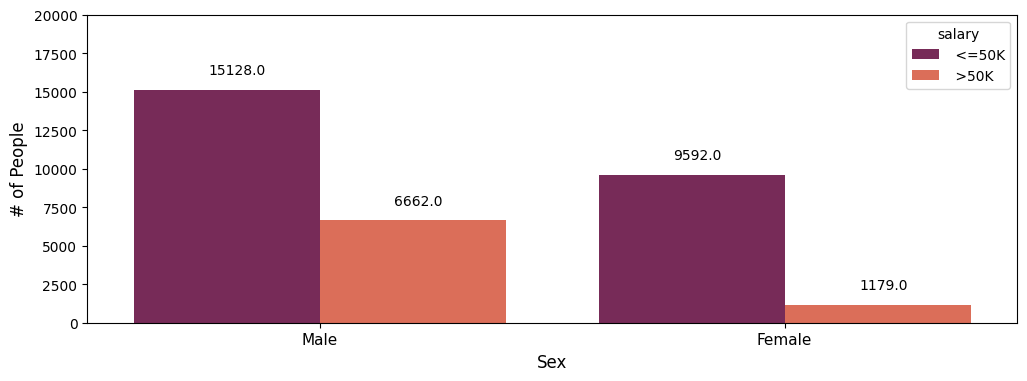

In [12]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'sex', hue="salary", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of People", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

### There are more women than men in our dataset and, apparently, women have a higher income ratio compared to men.

### 2. Based on Education

In [13]:
edu = df["education"].value_counts(normalize=True)

sns.barplot(edu.values, edu.index, palette='mako')
plt.title('Education')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

TypeError: ignored

## Here we see that the majority of people have completed HS-Grad, College or Bachelors

### 3.Based on Marital Status

In [ ]:
df['marital.status'].value_counts()

In [ ]:
status = df["marital.status"].value_counts(normalize=True)

sns.barplot(status.values, status.index, palette='viridis')
plt.title('Maritial Status')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()


### 4. Based on Age

In [ ]:
plt.figure(figsize=(12,4))

sns.distplot(df['age'])
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('# of People')
plt.show()

### The Average age is around 38-40 yrs

### 5. Based on Race

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'race', hue="income", palette = 'cubehelix')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Income", fontsize= 12)


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

### 6. Income With Respect to Education

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['education'],
              hue=df['income'], palette='Blues')
plt.title('Distribution of Income with respect to Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### 8. Income with respect to Marital Status

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['marital.status'],
              hue=df['income'], palette='vlag')
plt.title('Distribution of Income with respect to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### 9. Average Hours per Week

In [ ]:
plt.figure(figsize=(15,5))

sns.distplot(df['hours.per.week'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [ ]:
df["hours.per.week"].mean()

#### Seems that the average Hours per week put by an individual is 40

### 10. Occupation

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(30, 15))
sns.countplot(df['occupation'],
              hue=df['income'], palette='Blues')
plt.title('Distribution of Income with respect to Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

 =======

In [14]:
df = df.replace('?', np.nan)

In [15]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [18]:
## Replacing the None values with mode 

df["workclass"] = df["workclass"].fillna(df["workclass"].mode())
df["occupation"] = df["occupation"].fillna(df["occupation"].mode())
df["country"] = df["country"].fillna(df["ountry"].mode())
df.describe()


KeyError: ignored

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])

In [21]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary             int64
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        
        df[col] = le.fit_transform(df[col].astype(str))

In [23]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital-status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


### Here is it quite visible that education,fnlwgt,native.country,race, etc have minimum to no relation with the final output income of Income hence we will be dropping these

In [25]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [26]:
X = df.drop(["fnlwgt","education","marital-status","relationship","country"],axis=1)
X

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,7,13,1,4,1,2174,0,40,0
1,50,6,13,4,4,1,0,0,13,0
2,38,4,9,6,4,1,0,0,40,0
3,53,4,7,6,2,1,0,0,40,0
4,28,4,13,10,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12,13,4,0,0,0,38,0
32557,40,4,9,7,4,1,0,0,40,1
32558,58,4,9,1,4,0,0,0,40,0
32559,22,4,9,1,4,1,0,0,20,0


In [29]:
X = df.drop("salary",axis=1)
y = df.salary

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

In [32]:
# balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [33]:
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [34]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: salary, dtype: float64

In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


# ====== Models ======

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=30)

In [38]:
X_train.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
country           int64
dtype: object

In [39]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34608, 14)
X_test shape: (14832, 14)
y_train shape: (34608,)
y_test shape: (14832,)


In [40]:
lr = LogisticRegression(solver = "liblinear")
gn = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()


In [41]:
#LogisticRegression
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

#GaussianNB/ Naive Byers
gn.fit(X_train,y_train)
y_pred_gn = gn.predict(X_test)

#RandomForestClassifier
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

#DecisionTreeClassifier
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#SVC
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#XGB
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

## Evaluation of Models


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

In [43]:
print("Logistic Regression:")
print("Accuracy score:", round(accuracy_score(y_test, y_pred_lr) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_lr) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_lr) * 100,3))

Logistic Regression:
Accuracy score: 74.231
F1 Score:  74.335
MSE:  25.769


In [44]:
print("GaussianNB/ Naive Byers:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gn) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_gn) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_gn) * 100,3))

GaussianNB/ Naive Byers:
Accuracy score: 63.39
F1 Score:  46.152
MSE:  36.61


In [45]:
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf) * 100,3))

RandomForestClassifier:
Accuracy score: 92.638
F1 Score:  92.892
MSE:  7.362


In [46]:
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt) * 100,3))

DecisionTreeClassifier:
Accuracy score: 90.608
F1 Score:  91.018
MSE:  9.392


In [47]:
print("Support Vector Machine:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_svc) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_svc) * 100,3))

Support Vector Machine:
Accuracy score: 59.527
F1 Score:  33.084
MSE:  40.473


In [48]:
print("XGBoost Classifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_xgb) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_xgb) * 100,3))

XGBoost Classifier:
Accuracy score: 87.318
F1 Score:  87.663
MSE:  12.682


# Hyper - Tuning Parameters

### Decision Tree

In [49]:
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, param_grid=params,cv=5, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [50]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029554,0.002500,0.003558,0.000340,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
1,0.026556,0.000854,0.003310,0.000067,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
2,0.029494,0.002480,0.003766,0.000745,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
3,0.027856,0.001930,0.003433,0.000258,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49
4,0.028278,0.002323,0.003534,0.000518,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.767842,0.760618,0.757151,0.741511,0.758272,0.757079,0.008627,49


In [51]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [52]:
grid_search.best_score_

0.8454402955449541

In [53]:
dt_tuned = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=5)
dt_tuned.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [54]:
y_pred_dt_tuned = dt_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt_tuned) * 100,3))


RandomForestClassifier:
Accuracy score: 85.349
F1 Score:  85.631
MSE:  14.651


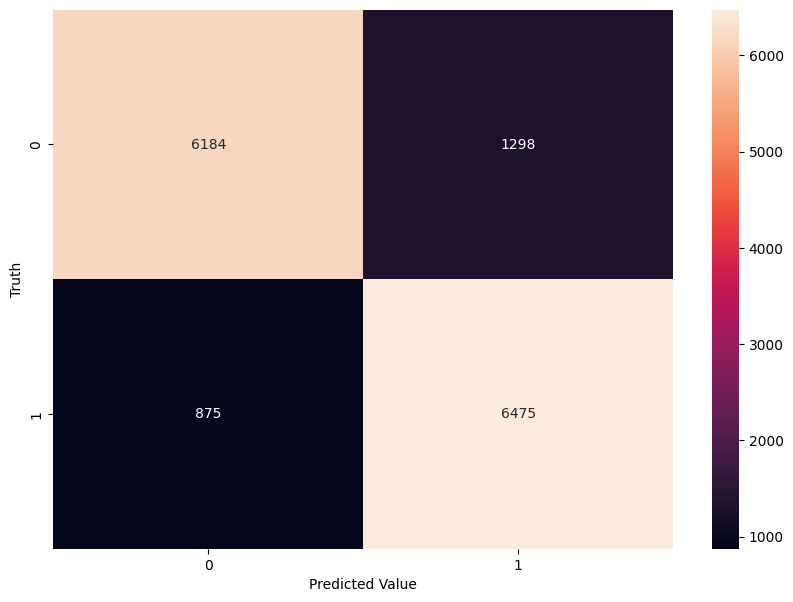

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

### Random Forest

In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

rf_tuned = RandomForestClassifier(random_state=30)
                       
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=parameters, cv=5, random_state=30)


In [57]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=30)

In [58]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 134}

In [59]:
rf_cv.best_score_

0.9102518658901146

In [60]:
rf_tuned = RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)

In [61]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 92.779
F1 Score:  93.031
MSE:  7.221


In [62]:
score_rf = pd.DataFrame(rf_cv.cv_results_)
score_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.446455,0.333343,0.190135,0.015678,102,40,"{'n_estimators': 102, 'max_depth': 40}",0.917365,0.909564,0.904941,0.907239,0.908395,0.909501,0.004219,5
1,1.198484,0.013524,0.072820,0.000485,40,134,"{'n_estimators': 40, 'max_depth': 134}",0.917220,0.912020,0.904941,0.907528,0.909551,0.910252,0.004191,1
2,2.541117,0.222111,0.148368,0.009147,79,126,"{'n_estimators': 79, 'max_depth': 126}",0.915198,0.911442,0.901474,0.905794,0.908973,0.908576,0.004699,9
3,2.921595,0.379634,0.162910,0.014843,87,134,"{'n_estimators': 87, 'max_depth': 134}",0.915487,0.911586,0.901474,0.905794,0.909262,0.908720,0.004804,7
4,2.233914,0.163305,0.131788,0.010403,71,95,"{'n_estimators': 71, 'max_depth': 95}",0.914620,0.910142,0.901762,0.904783,0.907817,0.907825,0.004417,10


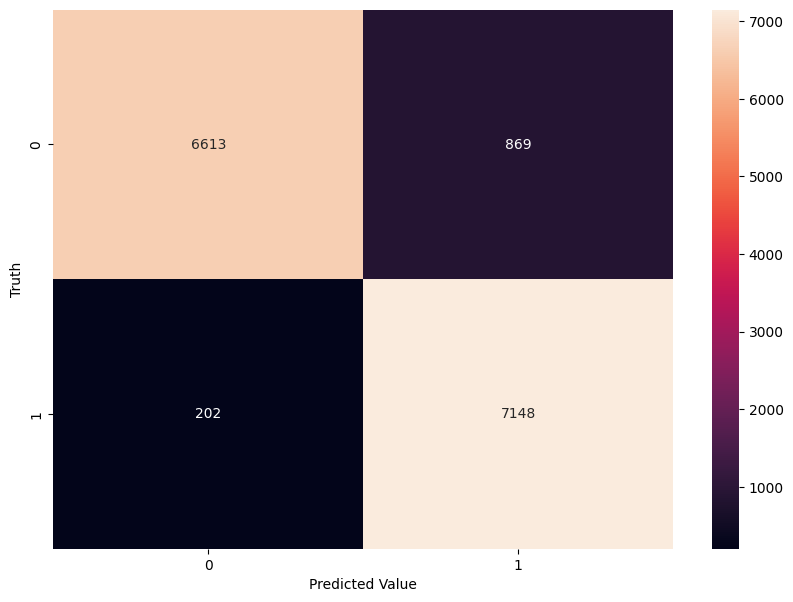

In [63]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

## Here we used multiple models like logistic regression, Naive Byers, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier and XGBoost classifier.


## The highest accuracy score of 92.199 and f1 score of 92.54 if from a Tuned Random Forest


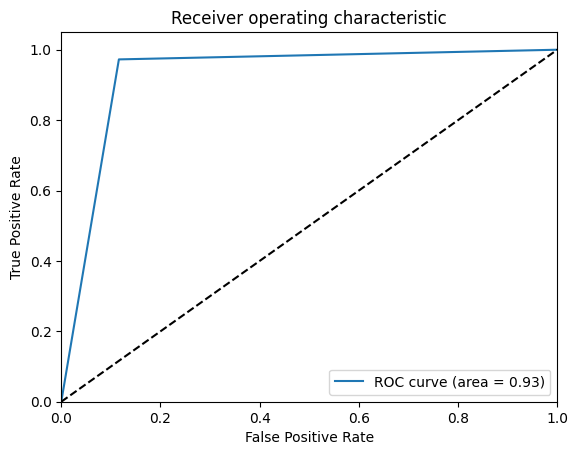

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test: true labels, y_score: predicted scores/probabilities
#y_test, 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_tuned)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
